# Lab | Random Forests

For this lab, you will be using the .CSV files provided in the `files_for_lab` folder.  These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.   
Begin a new Jupyter Notebook after Forking and Cloning this Repo.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.
- Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)
- Re-run the Random Forest algorithm to determine if the Feature Selection has improved the results.
- Discuss the output and its impact in the business scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the business?

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [103]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [104]:
print(numerical.shape)
numerical.head()

(95412, 315)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [105]:
print(categorical.shape)
categorical.head()

(95412, 22)


,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,86,1,20,1,93,10,96,1,96,1,79,3


In [106]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [136]:
df = pd.concat([numerical, categorical, target], axis = 1)
print(df.shape)
df.head()

(95412, 339)


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3

In [108]:
df.isna().sum().sum()

0

### Apply the Random Forests algorithm but this time only by upscaling the data to deal with the imbalance.


In [137]:
y = df['TARGET_B']
X = df.drop(['TARGET_B','TARGET_D'], axis=1)

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dealing with imbalance by upsampling

In [139]:
y.value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [140]:
trainset = pd.concat([X_train, y_train], axis=1)

from sklearn.utils import resample

category_0 = trainset[trainset['TARGET_B'] == 0]
category_1 = trainset[trainset['TARGET_B'] == 1]

In [141]:
category_1_oversampled = resample(category_1,
                                  replace=True,
                                  n_samples = len(category_0))

In [142]:
print(category_0.shape)
print(category_1_oversampled.shape)

(72464, 338)
(72464, 338)


In [143]:
trainset_new = pd.concat([category_0, category_1_oversampled], axis = 0)


In [144]:
trainset_new = trainset_new.sample(frac =1) 
X_train_up = trainset_new.drop(['TARGET_B'], axis=1)
y_train_up = trainset_new['TARGET_B']
print(X_train_up.shape)

(144928, 337)


In [145]:
X_train_num = X_train_up.select_dtypes(include = np.number)
X_train_cat = X_train_up.select_dtypes(include = object)

In [146]:
X_test_num  = X_test.select_dtypes(include = np.number)
X_test_cat  = X_test.select_dtypes(include = object)

In [147]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [148]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

In [149]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

In [150]:
X_train_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144923,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
144924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
144925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
144926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [151]:
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

In [152]:
X_test_encode

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
19079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [153]:
X_train1 = np.concatenate([X_train_norm, X_train_encode], axis=1)


In [154]:
X_test1 = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [155]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train1, y_train_up)
print(clf.score(X_train1, y_train_up))
print(clf.score(X_test1, y_test))

0.6218191101788474
0.609704973012629


In [157]:
y_test.value_counts()

0    18105
1      978
Name: TARGET_B, dtype: int64

In [158]:
y_pred = clf.predict(X_test1) 
pd.Series(y_pred).value_counts()

0    11551
1     7532
dtype: int64

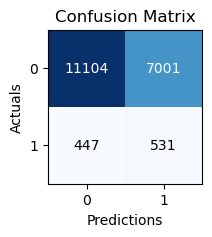

In [159]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(2, 2), cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

### Use Feature Selections that you have learned in class to decide if you want to use all of the features (Variance Threshold, RFE, PCA, etc.)

First we check for the best features we could keep with the variance method

In [160]:
numerical_scaled = scaler.fit_transform(numerical)

In [161]:
# then we check the column that have less than 20% variance
from sklearn.feature_selection import VarianceThreshold 
var_threshold = 0.02
sel = VarianceThreshold(threshold=(var_threshold))

sel = sel.fit(numerical_scaled) 
temp = sel.transform(numerical_scaled) 
temp = pd.DataFrame(temp)
print(numerical_scaled.shape)
print(temp.shape)

(95412, 315)
(95412, 79)


In [162]:
var_list = list(sel.get_support())
# list(zip(numerical.columns, var_list))

In [163]:
drop_list = [col[0] for col in zip(numerical.columns, var_list) if col[1] == False]

In [164]:
len(drop_list)

236

In [165]:
numerical = numerical.drop(drop_list, axis=1)

Then we apply K Best on the new numerical to see the 25 best features to keep.

In [166]:
numerical_scaled = scaler.fit_transform(numerical)

X_k = numerical_scaled
y_k = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=25).fit_transform(X_k, y_k)
selected = pd.DataFrame(kbest)
selected.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.666667,0.010101,0.079833,0.105833,0.230769,0.153846,0.020202,0.070707,0.131313,0.272727,0.474747,0.000000,0.020202,0.050505,0.171717,0.000000,0.515152,0.747475,0.313131,0.464646,0.285714,0.433333,0.498045,1.000000,0.622951
1,0.833333,0.000000,0.911333,0.869667,0.923077,0.769231,0.979798,0.989899,0.989899,0.989899,1.000000,0.949495,0.919192,0.919192,0.919192,0.478632,0.666667,0.393939,0.979798,0.000000,0.952381,0.183333,0.774510,0.333333,0.000000
2,0.333333,0.020202,0.082833,0.091000,0.153846,0.076923,0.000000,0.010101,0.060606,0.181818,0.505051,0.000000,0.000000,0.020202,0.090909,0.000000,0.313131,0.848485,0.505051,0.313131,0.428571,0.416667,0.078617,1.000000,0.967213
3,0.000000,0.000000,0.166667,0.210500,0.153846,0.076923,0.101010,0.252525,0.505051,0.696970,0.929293,0.101010,0.010101,0.080808,0.171717,0.997863,0.262626,0.676768,0.393939,0.555556,0.761905,0.433333,0.899764,1.000000,0.655738
4,0.333333,0.989899,0.096000,0.099000,0.307692,0.230769,0.000000,0.010101,0.020202,0.161616,0.676768,0.000000,0.252525,0.585859,0.747475,0.534188,0.111111,0.656566,0.060606,0.676768,0.285714,0.700000,0.037079,0.333333,0.409836


In [167]:
X_k.shape

(95412, 79)

In [168]:
model = SelectKBest(chi2, k=25).fit(X_k, y_k)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
print(df.sort_values(by = ['score'], ascending = False).head(25))

         score    Column
77  210.290810    RFA_2F
28   26.474583      HVP1
29   25.757492      HVP2
30   21.545080      HVP3
33   19.261394      HVP6
31   14.874056      HVP4
10   13.034181      ETH2
38   12.581538       RP1
39   11.022637       RP2
17    8.309269       HV1
18    8.260178       HV2
74    7.083556  CARDPROM
40    5.622626       RP3
32    5.545304      HVP5
78    4.838850  CLUSTER2
1     3.992481    INCOME
20    3.847846       HV4
19    3.772977       HV3
42    2.873016       MSA
75    2.751733  CONTROLN
45    2.675815     HHAS3
64    2.508204       HC6
58    2.472344     POBC2
72    2.311554     MHUC1
66    2.167060       HC8


In [169]:
list(df.Column.head(25))

['AGE',
 'INCOME',
 'WEALTH1',
 'VIETVETS',
 'WWIIVETS',
 'WEALTH2',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'ETH1',
 'ETH2',
 'HHN3',
 'DW1',
 'DW2',
 'DW4',
 'DW5',
 'DW6',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU5',
 'HHD2']

In [170]:
top_25 = numerical[['AGE',
 'INCOME',
 'WEALTH1',
 'VIETVETS',
 'WWIIVETS',
 'WEALTH2',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'ETH1',
 'ETH2',
 'HHN3',
 'DW1',
 'DW2',
 'DW4',
 'DW5',
 'DW6',
 'HV1',
 'HV2',
 'HV3',
 'HV4',
 'HU1',
 'HU2',
 'HU5',
 'HHD2']]

In [171]:
top_25

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2
0,60.000000,5,9,34,18,5,0,35,65,92,1,49,97,95,2,0,0,479,635,3,2,86,14,7,80
1,46.000000,6,9,55,11,9,99,0,0,67,0,75,99,99,0,0,0,5468,5218,12,10,96,4,9,94
2,61.611649,3,1,29,33,1,0,2,98,96,2,44,69,69,6,5,3,497,546,2,1,78,22,18,76
3,70.000000,1,4,14,31,0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,2,1,48,52,6,73
4,78.000000,3,2,9,53,9,99,0,0,2,98,57,99,98,0,0,0,576,594,4,3,90,10,0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,61.611649,5,9,47,11,9,99,0,0,78,10,48,54,38,32,24,14,988,1025,6,6,56,44,3,72
95408,48.000000,7,9,43,19,9,96,0,4,91,3,70,89,88,1,0,0,1679,1723,3,3,88,12,0,89
95409,60.000000,5,9,46,20,9,99,0,0,82,14,44,96,95,2,1,0,376,377,4,3,66,34,10,64
95410,58.000000,7,9,35,20,7,99,0,0,92,1,65,99,99,0,0,0,2421,2459,11,10,88,12,0,85


<Axes: >

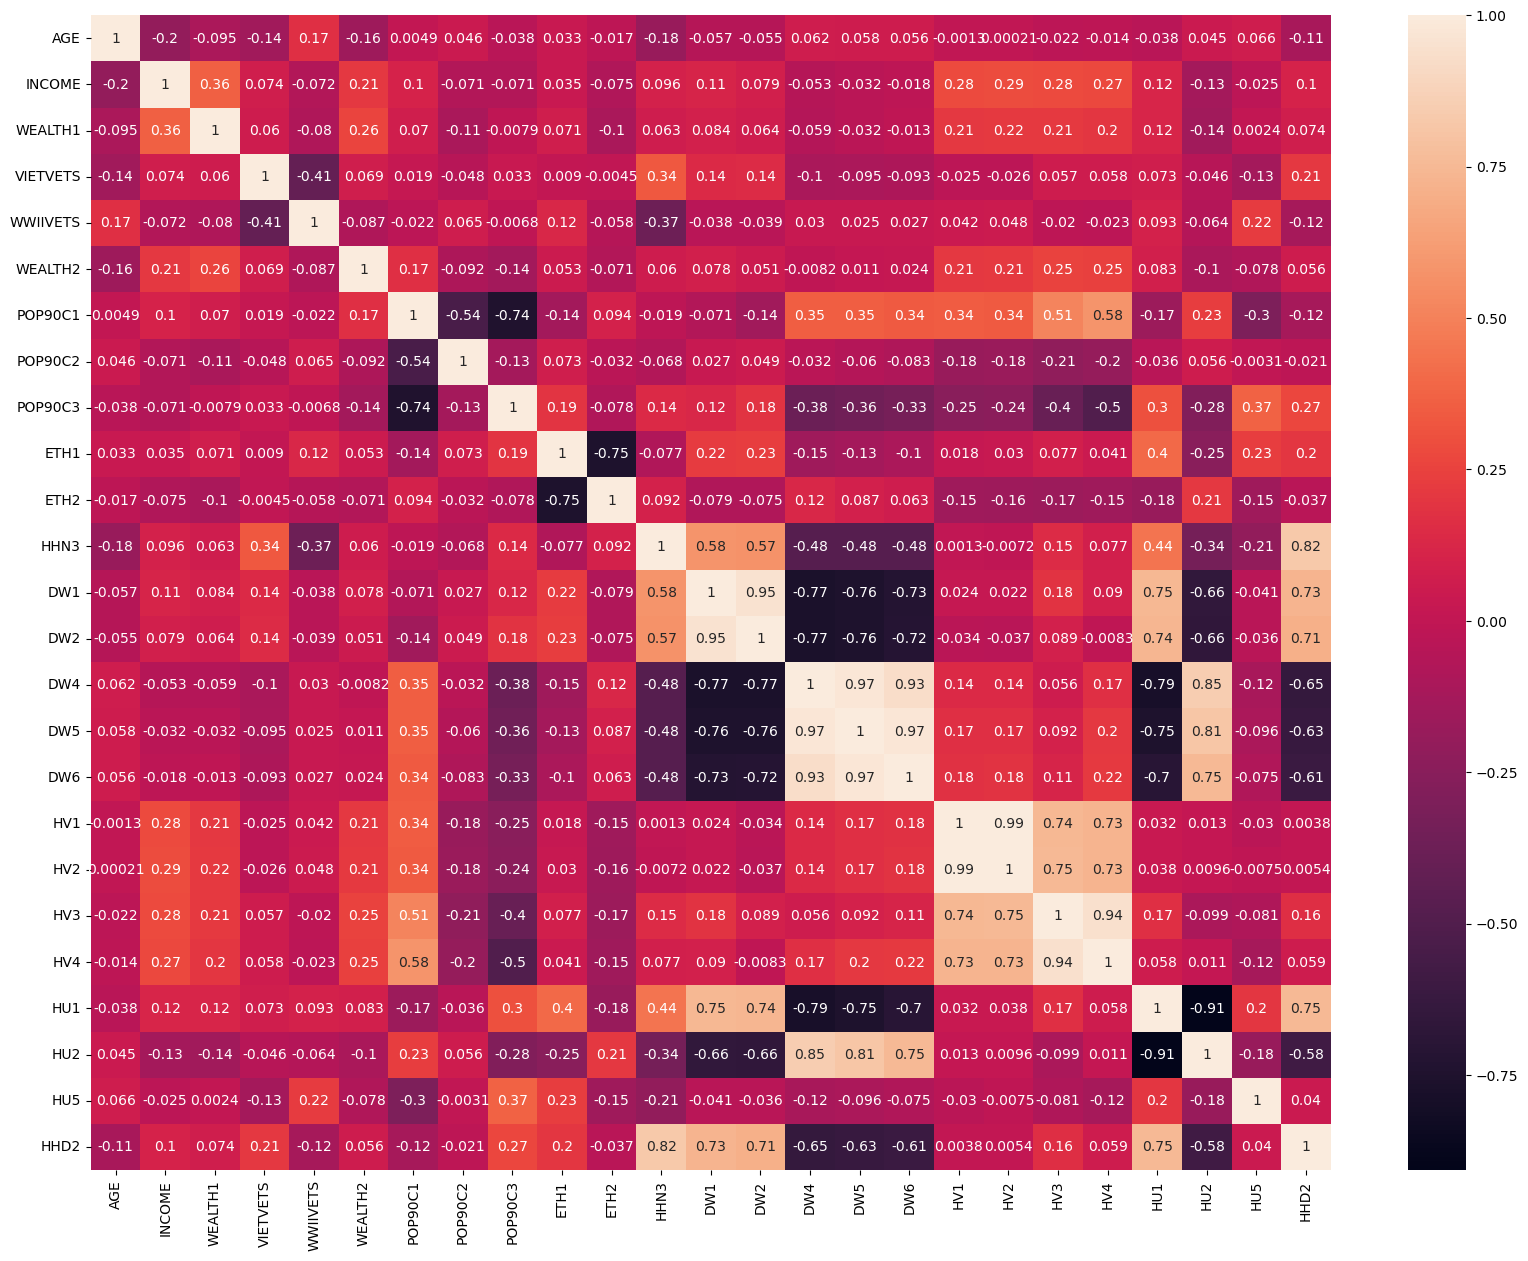

In [172]:
correlations_matrix = top_25.corr()

# Créer la heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlations_matrix, annot=True)


In [173]:
# removing features highly correlates between each other
top_ft = top_25.drop(columns=['DW2', 'DW5', 'DW6', 'HV2', 'HV3', 'HV4', 'HHD2'])

<Axes: >

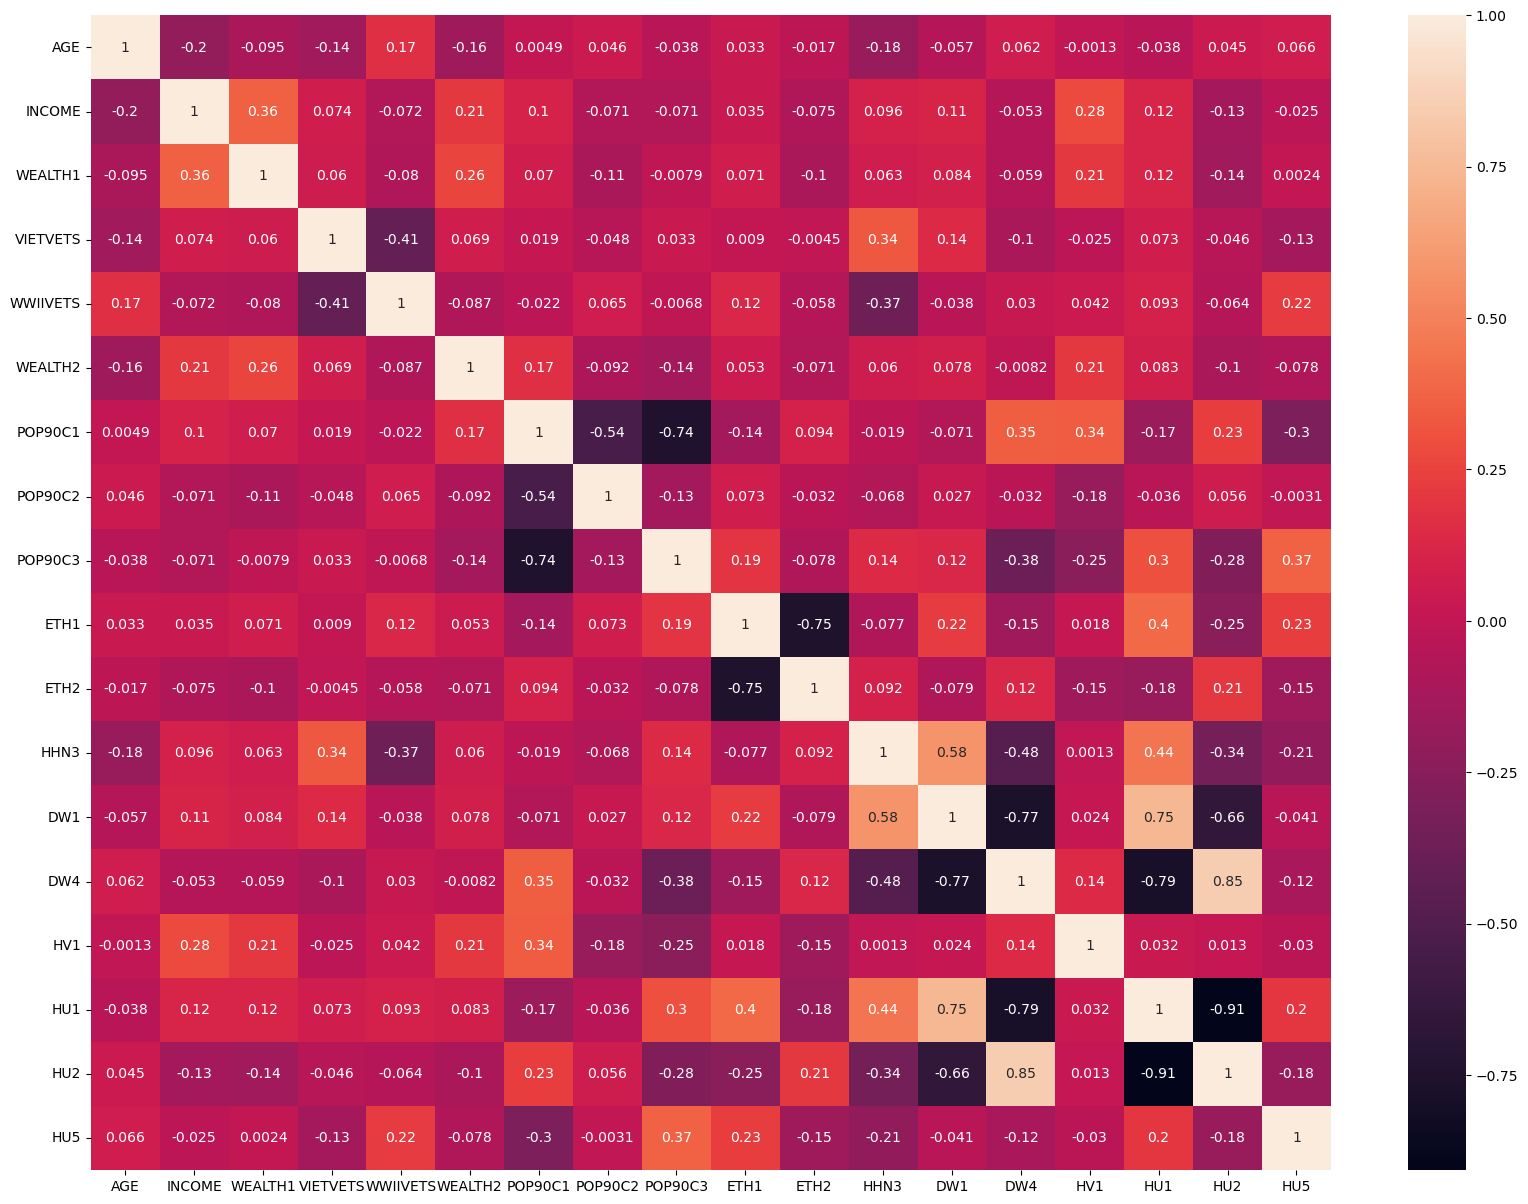

In [174]:
correlations_matrix = top_ft.corr()

# Créer la heatmap
plt.figure(figsize=(20,15))
sns.heatmap(correlations_matrix, annot=True)

We replace the previous X_train_num with only the top features columns


In [175]:
top_ft.columns

Index(['AGE', 'INCOME', 'WEALTH1', 'VIETVETS', 'WWIIVETS', 'WEALTH2',
       'POP90C1', 'POP90C2', 'POP90C3', 'ETH1', 'ETH2', 'HHN3', 'DW1', 'DW4',
       'HV1', 'HU1', 'HU2', 'HU5'],
      dtype='object')

In [176]:
X_train_num = X_train_up[['AGE', 'INCOME', 'WEALTH1', 'VIETVETS', 'WWIIVETS', 'WEALTH2',
       'POP90C1', 'POP90C2', 'POP90C3', 'ETH1', 'ETH2', 'HHN3', 'DW1', 'DW4',
       'HV1', 'HU1', 'HU2', 'HU5']]

In [177]:
X_train_num

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW4,HV1,HU1,HU2,HU5
36307,46.0,5,9,75,9,9,61,0,39,98,0,44,90,8,939,79,21,59
22911,73.0,5,9,15,35,1,99,0,0,95,2,27,36,64,871,45,55,0
3389,44.0,5,4,37,23,9,0,0,99,84,16,45,74,1,690,79,21,12
63255,65.0,2,0,0,99,1,0,99,0,65,34,39,68,25,383,31,69,0
21199,35.0,5,9,40,12,8,99,0,0,91,2,67,90,10,1159,81,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83843,66.0,7,8,40,8,9,98,0,2,84,7,47,54,45,1025,56,44,4
81112,57.0,5,9,30,41,2,0,0,99,73,2,41,84,2,304,74,26,18
12991,48.0,4,9,39,30,9,99,0,0,95,1,40,58,42,681,55,45,7
87231,84.0,2,4,40,40,4,0,99,0,98,0,36,98,1,731,78,22,8


In [178]:
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [179]:
X_test_num  = X_test[['AGE', 'INCOME', 'WEALTH1', 'VIETVETS', 'WWIIVETS', 'WEALTH2',
       'POP90C1', 'POP90C2', 'POP90C3', 'ETH1', 'ETH2', 'HHN3', 'DW1', 'DW4',
       'HV1', 'HU1', 'HU2', 'HU5']]

In [180]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

In [181]:
X_train2= np.concatenate([X_train_norm, X_train_encode], axis=1)


In [182]:
X_test2 = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [183]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train2, y_train_up)
print(clf.score(X_train2, y_train_up))
print(clf.score(X_test2, y_test))

0.6003394789136675
0.5900539747419169


In [187]:
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(clf, X_train2, y_train_up, cv=5)
print(cross_val_scores)
np.mean(cross_val_scores)

[0.60101428 0.59742634 0.59646036 0.59934449 0.59544592]


0.5979382791030762

In [184]:
display(y_test.value_counts())

0    18105
1      978
Name: TARGET_B, dtype: int64

In [185]:
y_pred = clf.predict(X_test2)
pd.Series(y_pred).value_counts()

0    11146
1     7937
dtype: int64

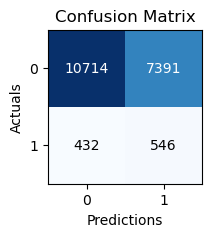

In [186]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

conf_matrix=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix,figsize=(2, 2), cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

Now let's analyse what would be the coast of false negative or false positive

In [95]:
#let's see the avg donations
round(target[target['TARGET_B']==1]['TARGET_D'].mean(),2)

15.62

In [96]:
# we predicted that 448 would not have donated when in fact they did
# we multiply this number by the avg amount of donation to know how much we would lose
448*15.62

6997.759999999999

In [93]:
# we predicted that 7201 would have donated when in fact they had not
# based on a 0.68 coast per mailing, let's see how much it would have cost
7201*0.68

4896.68

We would probably lose more money with the false negatives so we have to improve the recall.

In [100]:
print('Recall = ',round((530/(530*448)*100),2),'%')

Recall =  0.22 %


# Lab | Final regression model in "Health Care for All" Case

### Instructions

At this point, we have created a model to predict who will make a donation and who won't (Classification Model). But, what about the ammount of money that each person will give?

In this lab, subset those that have made a donation (Target B) and use that subset to create a model to predict how much money will they give (Target D) (Regression Model).

- Only look at people who have donated (Target B = 1)
- Use this new dataframe to create a model to predict how much they will donate (Target D)
- Using the regression model, make predictions on all of the people our classification model predicted will donate.
- See the pdf file for a schema of the process.

Evaluate the result of your model and estimate how much better the result are for the business in comparison with the naive scenario we discuss on Monday. (Just sending donation cards to everyone)

You can see a flowchart for the project here --  [Lucid Flowchart](https://lucid.app/lucidchart/dd701870-3d4e-45c3-b49c-01976181ae06/edit?viewport_loc=-15%2C-25%2C2150%2C1048%2C0_0&invitationId=inv_089ae862-550b-4e82-a606-a8122f39d2f2)

In [195]:
numerical = pd.read_csv('numerical.csv')

In [196]:
df = pd.concat([numerical, categorical, target], axis = 1)

In [197]:
df = df[(df['TARGET_B']==1)]

In [203]:
df = df.drop(['TARGET_B'], axis=1)

In [207]:
numerical = df.select_dtypes(include = np.number)

In [212]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,4,1,9,2707,672,929,99,0,0,45,55,97,1,0,2,1,0,0,0,0,1,0,0,1,0,0,0,35,42,43,37,47,50,27,34,43,23,9,20,27,16,8,6,15,15,13,37,21,14,16,8,15,23,30,47,29,11,2,55,10,13,22,190,267,89,49,1,10,10,8,8,8,0,902,960,8,8,88,12,97,3,11,42,72,60,34,79,21,8,1,7,12,21,5,21,58,17,0,1,0,0,4,35,74,99,0,1,64,63,62,14,4,2,8,0,5,1,7,0,95,96,96,96,5120.0,107.0,613.0,468,501,540,580,20328,6,8,19,23,23,11,7,1,2,4,6,13,27,25,14,8,1,1,14,2,66,1,61,39,20,74,17,2,2,0,0,0,2,4,1,75,20,21,1,67,71,82,62,80,60,80,65,99,0,1,21,20,8,11,17,1,1,10,0,5,3,2,1,0,0,3,23,5,2,4,12,7,3,2,1,14,12,7,5,11,4,1,4,70,10,0,140,5,3,24,21,9,32,7,3,23,3,16,7,1,2,0,12,25,3,40,20,27,7,0,0,2,12,0,0,3,1,4,1,0,0,0,4,0,1,58,95,1,0,4,95,69,23,4,13,2,17,35,91,99,1,12,3,93,0,5,1,0,1,99,1,97,99,99,9,2,6,3,26,65,5,12,61.0,15,10,2.0,7.0,5.0,12,4.066667,82943,1,3,3,12,3,1,87,1,36,1,88,1,94,4,96,3,87,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,1,5,9,2147,591,640,99,0,0,49,51,94,2,0,3,5,1,0,1,1,0,0,0,3,0,0,2,29,36,37,27,38,40,37,46,37,17,8,34,34,15,6,2,1,18,21,31,19,11,5,0,3,7,23,71,47,15,6,77,5,1,17,286,334,99,99,0,0,0,0,0,0,0,1002,1166,7,5,97,3,96,4,3,63,92,88,59,97,3,4,1,3,5,4,1,30,60,4,1,2,0,4,15,50,94,99,2,0,91,70,72,20,4,0,0,0,3,0,0,0,78,83,99,99,2920.0,201.0,618.0,633,638,652,663,19703,2,5,1,17,48,19,7,0,1,3,4,0,16,51,19,7,0,1,5,0,65,3,74,26,25,89,9,0,0,0,0,0,1,2,1,82,34,42,22,70,82,98,67,97,66,68,61,99,99,0,34,23,4,10,12,0,2,9,0,4,1,1,0,0,4,2,25,5,2,4,8,8,8,0,3,10,8,9,4,8,1,5,5,76,4,1,160,0,1,12,25,10,39,13,5,33,6,25,7,1,1,0,19,37,2,58,11,16,10,0,4,1,15,0,0,3,2,0,2,0,0,0,1,0,3,48,97,1,1,1,99,91,24,3,6,6,57,85,95,95,5,0,0,75,0,20,0,0,5,96,4,90,99,99,12,4,1,6,10,24,0,2,68.0,11,6,2.0,10.0,7.0,9,6.181818,190313,1,3,14,35,3,1,90,1,0,2,90,4,93,1,95,12,90,4,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,5,1,9,2160,683,900,89,0,11,48,52,99,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,42,47,49,40,48,50,20,33,42,25,7,14,23,21,17,13,5,14,13,33,22,18,24,7,22,22,43,35,19,6,1,72,7,5,16,165,240,69,58,1,28,27,4,0,0,0,1282,1399,5,4,96,4,97,3,8,27,76,71,25,89,11,2,0,2,9,18,2,16,62,21,0,0,0,15,33,74,88,98,2,0,70,67,67,13,3,28,0,0,2,2,0,0,

In [208]:
numerical_scaled = MinMaxScaler().fit_transform(numerical)

In [215]:
numerical_scaled = pd.DataFrame(numerical_scaled, columns=numerical.columns)

In [216]:
numerical_scaled['TARGET_D']

0       0.015075
1       0.030151
2       0.020101
3       0.060302
4       0.045226
          ...   
4838    0.095477
4839    0.070352
4840    0.010050
4841    0.045226
4842    0.085427
Name: TARGET_D, Length: 4843, dtype: float64

In [217]:
X_k = numerical_scaled
y_k = numerical_scaled['TARGET_D']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=25).fit_transform(X_k, y_k)
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

model = SelectKBest(chi2, k=10).fit(X_k, y_k)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
print(df.sort_values(by = ['score'], ascending = False).head(25))

ValueError: Unknown label type: (array([0.01507538, 0.03015075, 0.0201005 , ..., 0.01005025, 0.04522613,
       0.08542714]),)

In [204]:
y = df['TARGET_D']
X = df.drop(['TARGET_D'], axis=1)

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [206]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [202]:
X_train_cat.head()

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
24086,TX,H,F,L,F,B,S
8621,CA,H,M,L,G,B,R
83419,TX,H,M,L,F,A,C
5643,GA,H,M,L,F,A,C
51263,FL,U,F,L,F,A,U


In [218]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)

In [219]:
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized, columns=X_test_num.columns)

In [221]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_norm)  
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1 

In [222]:
num_components

95

In [223]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
cum_sum_eigenvalues

array([0.18325673, 0.28276878, 0.34313302, 0.39477425, 0.43628341,
       0.46891947, 0.49844434, 0.5270514 , 0.55377487, 0.57786695,
       0.6000208 , 0.61993417, 0.63750428, 0.65479141, 0.66990454,
       0.68331889, 0.69577207, 0.70681119, 0.71780173, 0.72806602,
       0.73766652, 0.74660729, 0.7553222 , 0.76320301, 0.77088645,
       0.77833105, 0.78561572, 0.79240256, 0.79904649, 0.80515105,
       0.81087844, 0.81641203, 0.82150532, 0.8264439 , 0.83117957,
       0.83557716, 0.83986749, 0.84409131, 0.84802014, 0.85164814,
       0.85523157, 0.85867039, 0.86201788, 0.86524182, 0.8683227 ,
       0.87130355, 0.87421819, 0.87703587, 0.87977019, 0.88241243,
       0.88496938, 0.88739913, 0.88980964, 0.89214796, 0.89440327,
       0.89662273, 0.89875439, 0.90077753, 0.90274493, 0.90462538,
       0.90647879, 0.90832005, 0.91007276, 0.91180989, 0.91347086,
       0.91508069, 0.91665081, 0.91820582, 0.9197071 , 0.92116258,
       0.92259476, 0.92402174, 0.92542367, 0.92679737, 0.92815

In [224]:
pca = PCA(95)
X_train_norm = pca.fit_transform(X_train_norm)
X_test_norm = pca.transform(X_test_norm)

In [225]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns) 
X_train_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols) 

In [226]:
cols = encoder.get_feature_names_out(input_features=X_test_cat.columns) 
X_test_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols) 

In [227]:
X_train_transformed = np.concatenate([X_train_norm, X_train_encode], axis=1)

In [228]:
X_test_transformed = np.concatenate([X_test_norm, X_test_encode], axis=1)


In [230]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_transformed, y_train)
print(clf.score(X_test_transformed, y_test))

0.36192934689873857


In [236]:
cross_val_scores = cross_val_score(clf, X_train_transformed, y_train, cv=5)
print(cross_val_scores)
np.mean(cross_val_scores)

[0.36691263 0.33388921 0.40953491 0.31644002 0.38000455]


0.3613562666507394